In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [14]:
class LogisticRegression():
    def __init__(self, alpha=0.01, iterations=1000):
        self.iterations = iterations
        self.alpha = alpha
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def logLoss(self, y, yhat):
        return -(y * np.log(yhat)) - ((1 - y) * np.log(1 - yhat))


    def compute_cost(self, y, yhat):
        m = len(y)
        cost = np.sum(self.logLoss(y, yhat)) / m
        return cost
    
    def gradientDescent(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        cost_history = [] 

        for i in range(self.iterations):
            z = np.dot(X, self.w) + self.b
            yhat = self.sigmoid(z)
            
            dw = (1 / m) * np.dot(X.T, (yhat - y))
            db = (1 / m) * np.sum(yhat - y)
            
            # Update weights and bias
            self.w -= self.alpha * dw
            self.b -= self.alpha * db

            cost = self.compute_cost(y, yhat)
            cost_history.append(cost)
    
        return cost_history
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        yhat = self.sigmoid(z)
        pred_class = [1 if p >= 0.50 else 0 for p in yhat]
        return np.array(pred_class)
    
    def accuracy(self, y, yhat):
        correct_predictions = np.sum(y == yhat)
        accuracy = correct_predictions / len(y)
        return accuracy
    
    def precision(self, y, yhat):
        tp = np.sum((y == 1) & (yhat == 1))
        fp = np.sum((y == 0) & (yhat == 1))
        if (tp + fp) == 0:
            return 0
        return tp / (tp + fp)
    
    def recall(self, y, yhat):
        tp = np.sum((y == 1) & (yhat == 1))
        fn = np.sum((y == 1) & (yhat == 0))
        if (tp + fn) == 0:
            return 0
        return tp / (tp + fn)
    
    def f1_score(self, y, yhat):
        prec = self.precision(y, yhat)
        rec = self.recall(y, yhat)
        if (prec + rec) == 0:
            return 0
        return 2 * (prec * rec) / (prec + rec)
    
    def confusion_matrix(self, y_true, y_pred):
        # Compute confusion matrix components
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        # Create confusion matrix
        cm = np.array([[TN, FP],
                       [FN, TP]])
        return cm

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(7, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

In [15]:
df = pd.read_csv('../Logistic_Regression/diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Normalizing/Scaling data
scaler = StandardScaler()
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
# Splitting features and labels
X = df.drop('Outcome', axis=1)  # Input Features
y = df['Outcome']  # Labels

In [18]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the model
model = LogisticRegression(alpha=0.01, iterations=1000)
cost_history = model.gradientDescent(X_train, y_train)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Print the weights and bias with corresponding feature names
print("Weights and Bias:")
feature_names = X.columns
for feature, weight in zip(feature_names, model.w):
    print(f"{feature}: {weight:.4f}")
print(f"\nBias: {model.b:.4f}")

Weights and Bias:
Pregnancies: -0.0078
Glucose: 0.7820
BloodPressure: -0.0757
SkinThickness: 0.0283
Insulin: -0.0310
BMI: 0.5387
DiabetesPedigreeFunction: -0.0882
Age: 0.4658

Bias: -0.5467


In [22]:
# Evaluate the model

accuracy = model.accuracy(y_test, y_pred)
precision = model.precision(y_test, y_pred)
recall = model.recall(y_test, y_pred)
f1 = model.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.72
Precision: 0.61
Recall: 0.62
F1 Score: 0.61


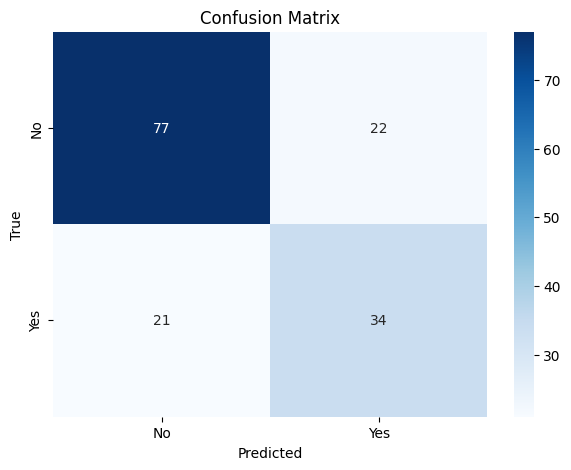

In [23]:
# Plot confusion matrix
model.plot_confusion_matrix(y_test, y_pred)

In [24]:
# Interpreting the results:

# MSE: Lower values of MSE indicate better model performance.
# It represents the average squared difference between the predicted and actual values.

# R-squared: This value ranges from 0 to 1, with higher values indicating a better fit.
# It represents the proportion of variance in the target variable explained by the model.
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.2792207792207792
R2: -0.21616161616161644
